In [24]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


# Specify directories 
data_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/raw_data"
output_dir = "C:/Users/singhy/Desktop/Chicago/cps_data/inflation/output"

NE = pd.read_csv(f"{data_dir}/fred_flows/NE.csv")
NU = pd.read_csv(f"{data_dir}/fred_flows/NU.csv")

In [25]:

# Basic Processing of stocks 
NE.columns = ['date', 'NE']
NU.columns = ['date', 'NU']

In [26]:
data = NU.merge(NE, on=['date'])

In [27]:
data['NU'] = data['NU']*100
data['NE'] = data['NE']*100


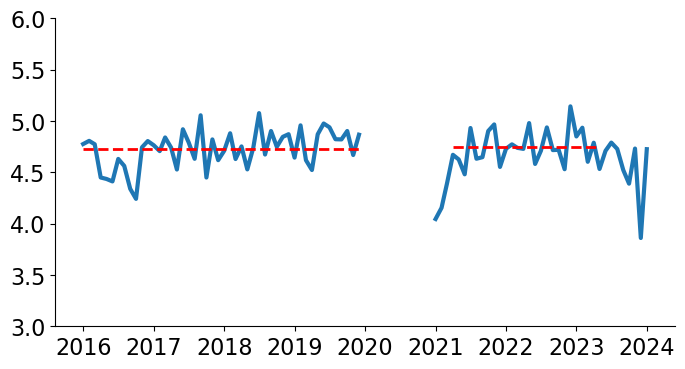

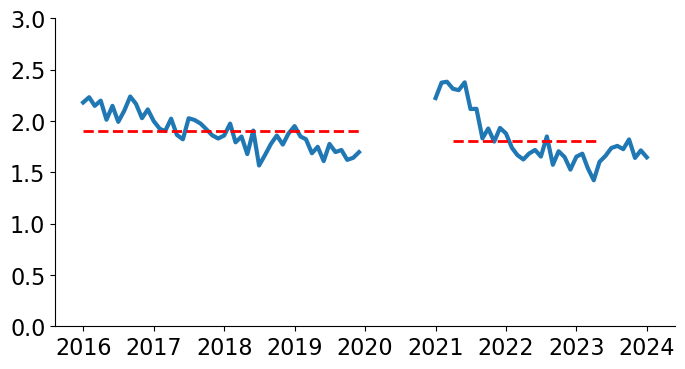

In [32]:
# Add pre/inflation period indicators
data['date'] = pd.to_datetime(data['date'])
data['inf_period'] = ((data['date'] >= '2021-04-01') & (data['date'] <= '2023-05-01')).astype(int)
data['pre_period'] = (data['date'] <= '2019-12-01').astype(int)

# Mask out 2020 for line break
plot_data = data.copy()
plot_data.loc[plot_data['date'].between('2020-01-01', '2020-12-31'), ['NE', 'NU']] = np.nan

# Define date ranges
pre_dates = plot_data.loc[plot_data['pre_period'] == 1, 'date']
inf_dates = plot_data.loc[plot_data['inf_period'] == 1, 'date']

# Compute averages
avg_ne_pre = plot_data.loc[plot_data['pre_period'] == 1, 'NE'].mean()
avg_ne_inf = plot_data.loc[plot_data['inf_period'] == 1, 'NE'].mean()

avg_nu_pre = plot_data.loc[plot_data['pre_period'] == 1, 'NU'].mean()
avg_nu_inf = plot_data.loc[plot_data['inf_period'] == 1, 'NU'].mean()

# Plot NE
plt.figure(figsize=(8, 4))
plt.plot(plot_data['date'], plot_data['NE'], linewidth=3)
plt.hlines(avg_ne_pre, xmin=pre_dates.min(), xmax=pre_dates.max(), color='red', linestyle='--', linewidth=2)
plt.hlines(avg_ne_inf, xmin=inf_dates.min(), xmax=inf_dates.max(), color='red', linestyle='--', linewidth=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(3, 6)  # adjust as needed
plt.savefig(f"{output_dir}/figures/ne_rate.pdf")

# Plot NU
plt.figure(figsize=(8, 4))
plt.plot(plot_data['date'], plot_data['NU'], linewidth=3)
plt.hlines(avg_nu_pre, xmin=pre_dates.min(), xmax=pre_dates.max(), color='red', linestyle='--', linewidth=2)
plt.hlines(avg_nu_inf, xmin=inf_dates.min(), xmax=inf_dates.max(), color='red', linestyle='--', linewidth=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(0, 3)  # adjust as needed
plt.savefig(f"{output_dir}/figures/nu_rate.pdf")
